Pandas: limpeza e tratamento de dados
<br>
`https://cursos.alura.com.br/course/pandas-limpeza-tratamento-dados`

In [1]:
!python --version

Python 3.10.12


In [2]:
!pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: altair, arviz, bigframes, bokeh, bqplot, cmdstanpy, cufflinks, datascience, db-dtypes, dopamine-rl, fastai, geemap, geopandas, google-colab, gspread-dataframe, holoviews, ibis-framework, mizani, mlxtend, pandas-datareader, pandas-gbq, panel, pins, plotnine, prophet, pymc, seaborn, sklearn-pandas, statsmodels, vega-datasets, xarray, yfinance


In [3]:
import pandas as pd

In [4]:
import requests

In [5]:
import json

In [6]:
import numpy as np

In [7]:
import seaborn as sns

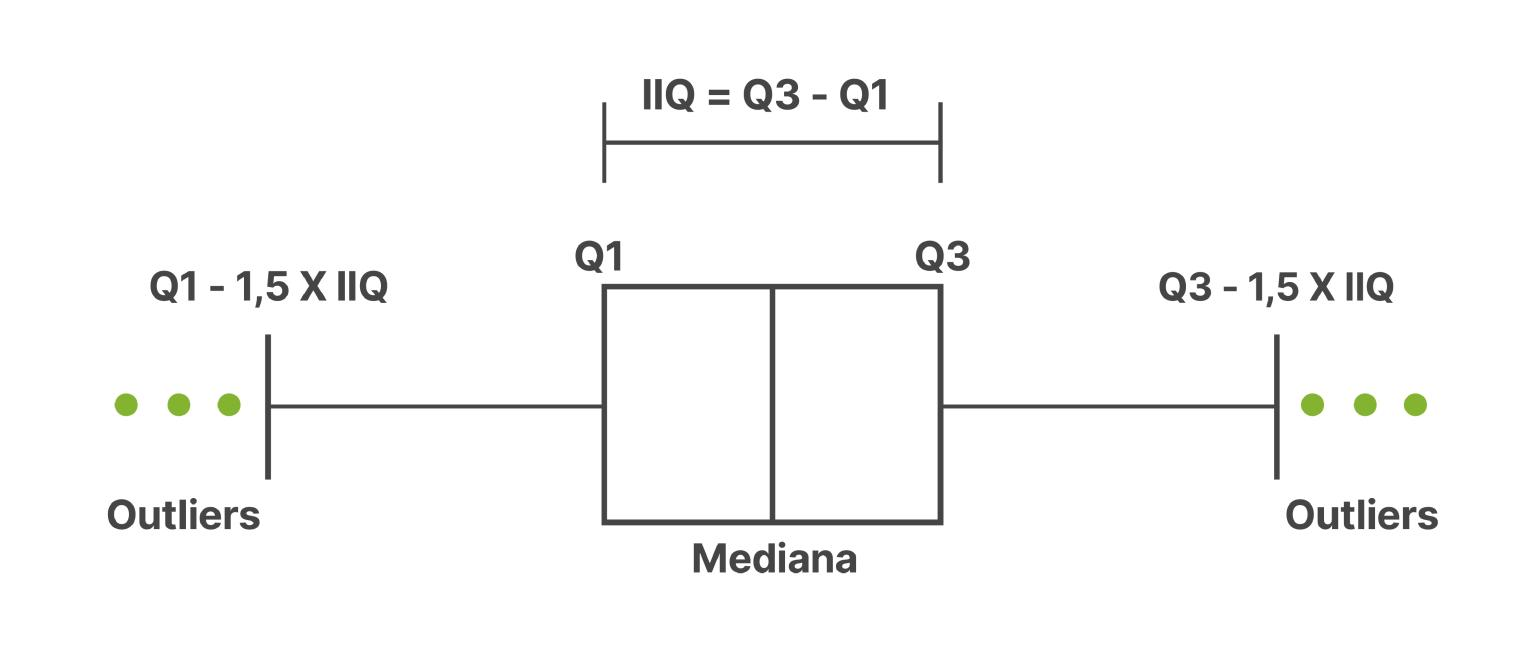

# Conhecendo os dados

In [8]:
url = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/dataset-telecon.json'

In [9]:
dados_churn = pd.read_json(url)
dados_churn.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [10]:
dados_churn.conta[0]

{'contrato': None,
 'faturamente_eletronico': None,
 'metodo_pagamento': None,
 'cobranca': {'mensal': None, 'Total': None}}

In [11]:
pd.json_normalize(dados_churn.conta).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [12]:
pd.json_normalize(dados_churn.telefone).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


# Tranformando dados em uma tabela

In [13]:
response = requests.get(url)

with open('dataset-telecon.json', 'wb') as file:
    file.write(response.content)

In [14]:
!ls

cursos_cadastrados.json  dataset-telecon.json  drive  sample_data


In [15]:
with open('dataset-telecon.json') as f:
  json_bruto = json.load(f)

In [16]:
json_bruto

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [17]:
dados_normalizados = pd.json_normalize(json_bruto, sep='_')
dados_normalizados.head()

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


# Desafio: utilizando parâmetros do json_normalize

In [18]:
dados_desafio = {
  "nome": "João",
  "idade": 28,
  "enderecos": [
    {
      "tipo": "casa",
      "rua": "Rua A",
      "numero": 123,
      "cidade": "São Paulo"
    },
    {
      "tipo": "trabalho",
      "rua": "Rua B",
      "numero": 456,
      "cidade": "Rio de Janeiro"
    }
  ]
}

In [19]:
pd.json_normalize(dados_desafio, record_path='enderecos', meta=['nome', 'idade'])

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


# Transformação inicial dos dados

Cliente

`genero`: gênero (masculino e feminino)<br>
`idoso`: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos<br>
`parceiro`: se o(a) cliente possui ou não um(a) parceiro ou parceira<br>
`dependentes`: se o(a) cliente possui ou não dependentes<br>
`tempo_servico`: meses de contrato do(a) cliente<br>

<br>

Serviço de telefonia

`servico_telefone`: assinatura de serviço telefônico<br>
`varias_linhas`: assinatura de mais de uma linha de telefone

<br>

Serviço de internet

`servico_internet`: assinatura de um provedor internet<br>
`seguranca_online`: assinatura adicional de segurança online<br>
`backup_online`: assinatura adicional de backup online<br>
`protecao_dispositivo`: assinatura adicional de proteção no dispositivo<br>
`suporte_tecnico`: assinatura adicional de suporte técnico, menos tempo de espera<br>
`tv_streaming`: assinatura de TV a cabo<br>
`filmes_streaming`: assinatura de streaming de filmes<br>

<br>

Conta

`contrato`: tipo de contrato<br>
`faturamente_eletronico`: se o(a) cliente prefere receber a fatura online<br>
`metodo_pagamento`: forma de pagamento<br>
`cobranca.mensal`: total de todos os serviços do(a) cliente por mês<br>
`cobranca.Total`: total gasto pelo(a) cliente

In [20]:
dados_normalizados.head()

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [21]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente_genero                 7344 non-null   object 
 3   cliente_idoso                  7344 non-null   int64  
 4   cliente_parceiro               7344 non-null   object 
 5   cliente_dependentes            7344 non-null   object 
 6   cliente_tempo_servico          7336 non-null   float64
 7   telefone_servico_telefone      7344 non-null   object 
 8   telefone_varias_linhas         7344 non-null   object 
 9   internet_servico_internet      7344 non-null   object 
 10  internet_seguranca_online      7344 non-null   object 
 11  internet_backup_online         7344 non-null   object 
 12  internet_protecao_dispositivo  7344 non-null   o

RangeIndex pode nos dizer se há algum index saltado

Há dados nulos entre os valores do nosso dataframe

In [22]:
dados_normalizados[dados_normalizados.conta_cobranca_Total == ' '].head()

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,


In [23]:
colunas = ['cliente_tempo_servico', 'conta_contrato', 'conta_cobranca_mensal', 'conta_cobranca_Total']

dados_normalizados[dados_normalizados.conta_cobranca_Total == ' '][colunas]

,cliente_tempo_servico,conta_contrato,conta_cobranca_mensal,conta_cobranca_Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [24]:
idx = dados_normalizados[dados_normalizados.conta_cobranca_Total == ' '].index
idx

Int64Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [25]:
dados_normalizados.loc[idx, 'conta_cobranca_Total'] = dados_normalizados.loc[idx, 'conta_cobranca_mensal'] * 24

In [26]:
dados_normalizados.loc[idx, 'cliente_tempo_servico'] = 24

In [27]:
dados_normalizados.loc[idx, colunas]

,cliente_tempo_servico,conta_contrato,conta_cobranca_mensal,conta_cobranca_Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [28]:
dados_normalizados.conta_cobranca_Total = dados_normalizados.conta_cobranca_Total.astype('float')

In [29]:
dados_normalizados.conta_cobranca_Total.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7344 entries, 0 to 7343
Series name: conta_cobranca_Total
Non-Null Count  Dtype  
--------------  -----  
7328 non-null   float64
dtypes: float64(1)
memory usage: 57.5 KB


# Identificando e tratando colunas vazias

In [30]:
for col in dados_normalizados.columns:
    print(f'coluna: {col}')
    print(dados_normalizados[col].unique())
    print('-' * 30)

coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
coluna: Churn
['nao' 'sim' '']
------------------------------
coluna: cliente_genero
['feminino' 'masculino']
------------------------------
coluna: cliente_idoso
[0 1]
------------------------------
coluna: cliente_parceiro
['sim' 'nao']
------------------------------
coluna: cliente_dependentes
['sim' 'nao']
------------------------------
coluna: cliente_tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [31]:
dados_normalizados.Churn.unique()

array(['nao', 'sim', ''], dtype=object)

In [32]:
dados_normalizados.query('Churn == \'\'')

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


Necessário descartar dados os quais não temos certeza se ocorreu churn ou não

In [33]:
dados_sem_vazio = dados_normalizados[dados_normalizados.Churn != ''].copy()
dados_sem_vazio.shape

(7118, 21)

In [34]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente_genero                 7118 non-null   object 
 3   cliente_idoso                  7118 non-null   int64  
 4   cliente_parceiro               7118 non-null   object 
 5   cliente_dependentes            7118 non-null   object 
 6   cliente_tempo_servico          7110 non-null   float64
 7   telefone_servico_telefone      7118 non-null   object 
 8   telefone_varias_linhas         7118 non-null   object 
 9   internet_servico_internet      7118 non-null   object 
 10  internet_seguranca_online      7118 non-null   object 
 11  internet_backup_online         7118 non-null   object 
 12  internet_protecao_dispositivo  7118 non-null   o

Ao remover linhas, ficamos com índices saltados

In [35]:
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [36]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente_genero                 7118 non-null   object 
 3   cliente_idoso                  7118 non-null   int64  
 4   cliente_parceiro               7118 non-null   object 
 5   cliente_dependentes            7118 non-null   object 
 6   cliente_tempo_servico          7110 non-null   float64
 7   telefone_servico_telefone      7118 non-null   object 
 8   telefone_varias_linhas         7118 non-null   object 
 9   internet_servico_internet      7118 non-null   object 
 10  internet_seguranca_online      7118 non-null   object 
 11  internet_backup_online         7118 non-null   object 
 12  internet_protecao_dispositivo  7118 non-null   o

# Desafio: tratando os dados

In [37]:
dados_desafio = {
  "pessoas": [
    {
      "nome": "João",
      "idade": "25",
      "endereco": {
        "rua": "Rua A",
        "numero": 123,
        "cidade": "São Paulo"
      },
      "telefones": [
        "11 1111-1111",
        "11 2222-2222"
      ]
    },
    {
      "nome": "Maria",
      "idade": 30,
      "endereco": {
        "rua": "",
        "numero": 456,
        "cidade": "Rio de Janeiro"
      },
      "telefones": [
        "21 3333-3333"
      ]
    }
  ]
}

In [38]:
df_desafio = pd.json_normalize(dados_desafio, record_path='pessoas', sep='_')
df_desafio

,nome,idade,telefones,endereco_rua,endereco_numero,endereco_cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [39]:
df_desafio = df_desafio.explode('telefones')
df_desafio

,nome,idade,telefones,endereco_rua,endereco_numero,endereco_cidade
0,João,25,11 1111-1111,Rua A,123,São Paulo
0,João,25,11 2222-2222,Rua A,123,São Paulo
1,Maria,30,21 3333-3333,,456,Rio de Janeiro


In [40]:
df_desafio.reset_index(drop=True, inplace=True)
df_desafio

,nome,idade,telefones,endereco_rua,endereco_numero,endereco_cidade
0,João,25,11 1111-1111,Rua A,123,São Paulo
1,João,25,11 2222-2222,Rua A,123,São Paulo
2,Maria,30,21 3333-3333,,456,Rio de Janeiro


In [41]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             3 non-null      object
 1   idade            3 non-null      object
 2   telefones        3 non-null      object
 3   endereco_rua     3 non-null      object
 4   endereco_numero  3 non-null      int64 
 5   endereco_cidade  3 non-null      object
dtypes: int64(1), object(5)
memory usage: 272.0+ bytes


In [42]:
df_desafio.idade = df_desafio.idade.astype('int')

In [43]:
df_desafio.endereco_numero = df_desafio.endereco_numero.astype('int')

In [44]:
df_desafio.query('endereco_rua == \'\'')

,nome,idade,telefones,endereco_rua,endereco_numero,endereco_cidade
2,Maria,30,21 3333-3333,,456,Rio de Janeiro


In [45]:
df_desafio[df_desafio.endereco_rua == '']

,nome,idade,telefones,endereco_rua,endereco_numero,endereco_cidade
2,Maria,30,21 3333-3333,,456,Rio de Janeiro


In [46]:
df_desafio.loc[df_desafio.endereco_rua == '']

,nome,idade,telefones,endereco_rua,endereco_numero,endereco_cidade
2,Maria,30,21 3333-3333,,456,Rio de Janeiro


In [47]:
df_desafio_filtrado = df_desafio.loc[df_desafio.endereco_rua != '']
df_desafio_filtrado

,nome,idade,telefones,endereco_rua,endereco_numero,endereco_cidade
0,João,25,11 1111-1111,Rua A,123,São Paulo
1,João,25,11 2222-2222,Rua A,123,São Paulo


# Utilizando dados duplicados e nulos

In [48]:
dados_sem_vazio.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [49]:
dados_sem_vazio.duplicated().sum()

75

In [50]:
filtro_duplicadas = dados_sem_vazio.duplicated()
filtro_duplicadas

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [51]:
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


É necessário remover as amostras duplicadas antes de inserir a base em um modelo de machine learning

In [52]:
dados_sem_vazio.drop_duplicates(inplace=True)

do pandas `drop_duplicates()` also reset indexes?<br>
yes, by default the `ignore_index` parameter is set to `True`

In [53]:
dados_sem_vazio.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [54]:
dados_sem_vazio.duplicated().sum()

0

# Identificando e substituindo dados nulos

In [55]:
dados_sem_vazio.isna()

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente_genero                    0
cliente_idoso                     0
cliente_parceiro                  0
cliente_dependentes               0
cliente_tempo_servico             8
telefone_servico_telefone         0
telefone_varias_linhas            0
internet_servico_internet         0
internet_seguranca_online         0
internet_backup_online            0
internet_protecao_dispositivo     0
internet_suporte_tecnico          0
internet_tv_streaming             0
internet_filmes_streaming         0
conta_contrato                   31
conta_faturamente_eletronico     17
conta_metodo_pagamento           26
conta_cobranca_mensal            17
conta_cobranca_Total             15
dtype: int64

In [57]:
dados_sem_vazio.isna().sum().sum()

114

In [58]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


In [59]:
filtro = dados_sem_vazio.cliente_tempo_servico.isna()
filtro

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: cliente_tempo_servico, Length: 7043, dtype: bool

In [60]:
colunas = ['cliente_tempo_servico', 'conta_cobranca_mensal', 'conta_cobranca_Total']

dados_sem_vazio[filtro][colunas]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [61]:
idx = dados_sem_vazio[filtro][colunas].index
idx

Int64Index([9, 176, 181, 751, 3523, 5273, 5276, 6134], dtype='int64')

Preencher a coluna que possui valores nulos a partir dos valores de outras duas colunas

In [62]:
5957.90 / 90.45

65.86954118297402

In [63]:
np.ceil(5957.90 / 90.45)

66.0

In [64]:
355.90 / 29.30

12.146757679180887

In [65]:
np.ceil(355.90 / 29.30)

13.0

In [66]:
dados_sem_vazio.cliente_tempo_servico.fillna(np.ceil(dados_sem_vazio.conta_cobranca_Total / dados_sem_vazio.conta_cobranca_mensal), inplace=True)

In [67]:
dados_sem_vazio[filtro][colunas]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [68]:
dados_sem_vazio.loc[idx]

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
9,0016-QLJIS,nao,feminino,0,sim,sim,66.0,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,13.0,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,5.0,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
751,1095-WGNGG,nao,feminino,0,sim,nao,60.0,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
3523,4994-OBRSZ,nao,masculino,0,nao,sim,14.0,sim,nao,DSL,...,sim,sim,sim,nao,sim,dois anos,nao,transferencia bancaria (automatica),76.10,1054.80
5273,7435-ZNUYY,nao,masculino,0,nao,nao,6.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,20.60,116.60
5276,7445-WMRBW,nao,feminino,0,nao,nao,49.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,um ano,sim,transferencia bancaria (automatica),73.85,3581.40
6134,8690-UPCZI,nao,masculino,0,sim,sim,29.0,sim,sim,DSL,...,nao,nao,sim,sim,nao,um ano,nao,transferencia bancaria (automatica),69.05,1958.45


In [69]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente_genero                    0
cliente_idoso                     0
cliente_parceiro                  0
cliente_dependentes               0
cliente_tempo_servico             0
telefone_servico_telefone         0
telefone_varias_linhas            0
internet_servico_internet         0
internet_seguranca_online         0
internet_backup_online            0
internet_protecao_dispositivo     0
internet_suporte_tecnico          0
internet_tv_streaming             0
internet_filmes_streaming         0
conta_contrato                   31
conta_faturamente_eletronico     17
conta_metodo_pagamento           26
conta_cobranca_mensal            17
conta_cobranca_Total             15
dtype: int64

# Retirando os dados nulos

In [70]:
dados_sem_vazio.conta_contrato.value_counts()

mes a mes    3861
dois anos    1688
um ano       1463
Name: conta_contrato, dtype: int64

In [71]:
dados_sem_vazio.conta_contrato.mode()

0    mes a mes
Name: conta_contrato, dtype: object

Retirar amostras com dados nulos que não podemos inferir com exatidão

In [72]:
colunas_dropar = ['conta_contrato', 'conta_faturamente_eletronico', 'conta_metodo_pagamento']

In [73]:
dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

37

In [74]:
df_sem_nulo = dados_sem_vazio.dropna(subset=colunas_dropar).copy()
df_sem_nulo

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [75]:
df_sem_nulo.reset_index(drop=True, inplace=True)
df_sem_nulo

,id_cliente,Churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [76]:
df_sem_nulo.isna().sum()

id_cliente                       0
Churn                            0
cliente_genero                   0
cliente_idoso                    0
cliente_parceiro                 0
cliente_dependentes              0
cliente_tempo_servico            0
telefone_servico_telefone        0
telefone_varias_linhas           0
internet_servico_internet        0
internet_seguranca_online        0
internet_backup_online           0
internet_protecao_dispositivo    0
internet_suporte_tecnico         0
internet_tv_streaming            0
internet_filmes_streaming        0
conta_contrato                   0
conta_faturamente_eletronico     0
conta_metodo_pagamento           0
conta_cobranca_mensal            0
conta_cobranca_Total             0
dtype: int64

# Desafio: tratando uma base de dados

In [77]:
url_desafio = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/cursos_cadastrados.json'

In [78]:
response = requests.get(url_desafio)

with open('cursos_cadastrados.json', 'wb') as file:
    file.write(response.content)

In [79]:
!ls

cursos_cadastrados.json  dataset-telecon.json  drive  sample_data


In [80]:
with open('cursos_cadastrados.json', 'r') as f:
    dados = json.load(f)

In [81]:
df_desafio = pd.json_normalize(dados, sep='_')
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor_nome,instrutor_email,instrutor_telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [82]:
df_desafio.isna().sum().sum()

6

In [83]:
df_desafio[df_desafio.isna().any(axis=1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor_nome,instrutor_email,instrutor_telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


In [84]:
df_desafio.dropna(inplace=True)
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor_nome,instrutor_email,instrutor_telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [85]:
df_desafio.duplicated()

0    False
2    False
3    False
4    False
5     True
dtype: bool

In [86]:
df_desafio.drop_duplicates(inplace=True)
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor_nome,instrutor_email,instrutor_telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [87]:
df_desafio.replace('', np.nan, inplace=True)
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor_nome,instrutor_email,instrutor_telefone
0,Introdução à programação,Programação,20 horas,100.0,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75.0,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,NaN,2022-04-01,NaN,Curso avançado sobre inteligência artificial c...,129.9,NaN,contato@emailaleatorio.com,NaN
4,Inglês para negócios,Idiomas,20 horas,30.0,NaN,NaN,Curso de inglês para negócios,69.9,John Smith,NaN,NaN


In [88]:
df_desafio.dropna(inplace=True)
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor_nome,instrutor_email,instrutor_telefone
0,Introdução à programação,Programação,20 horas,100.0,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75.0,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [89]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   curso               2 non-null      object 
 1   categoria           2 non-null      object 
 2   carga_horaria       2 non-null      object 
 3   concluintes         2 non-null      float64
 4   data_inicio         2 non-null      object 
 5   data_conclusao      2 non-null      object 
 6   descricao           2 non-null      object 
 7   preco               2 non-null      object 
 8   instrutor_nome      2 non-null      object 
 9   instrutor_email     2 non-null      object 
 10  instrutor_telefone  2 non-null      object 
dtypes: float64(1), object(10)
memory usage: 192.0+ bytes


In [90]:
df_desafio.concluintes = df_desafio.concluintes.astype(np.int64)

df_desafio.data_inicio = pd.to_datetime(df_desafio.data_inicio)
df_desafio.data_conclusao = pd.to_datetime(df_desafio.data_conclusao)

df_desafio.preco = df_desafio.preco.astype(np.float64)

In [91]:
df_desafio.carga_horaria = df_desafio.carga_horaria.str.replace('horas', '').str.strip()
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor_nome,instrutor_email,instrutor_telefone
0,Introdução à programação,Programação,20,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.9,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [92]:
df_desafio.carga_horaria = df_desafio.carga_horaria.astype(np.int64)

In [93]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      int64         
 3   concluintes         2 non-null      int64         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor_nome      2 non-null      object        
 9   instrutor_email     2 non-null      object        
 10  instrutor_telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 192.0+ bytes


In [94]:
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor_nome,instrutor_email,instrutor_telefone
0,Introdução à programação,Programação,20,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.9,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


# Identificando os outliers

In [95]:
df_sem_nulo.describe()

,cliente_idoso,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


In [96]:
1080 / 12

90.0

<Axes: xlabel='cliente_tempo_servico'>

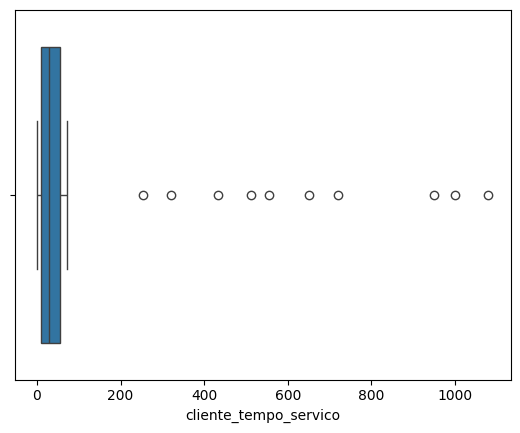

In [97]:
sns.boxplot(x=df_sem_nulo.cliente_tempo_servico)

Encontrando os valores presentes na imagem

In [98]:
q1 = df_sem_nulo.cliente_tempo_servico.quantile(.25)
q1

9.0

In [99]:
q3 = df_sem_nulo.cliente_tempo_servico.quantile(.75)
q3

56.0

In [100]:
iqr = q3 - q1
iqr

47.0

In [101]:
limite_inferior = q1 - 1.5 * iqr
limite_inferior

-61.5

In [102]:
limite_superior = q3 + 1.5 * iqr
limite_superior

126.5

In [103]:
type(df_sem_nulo['cliente_tempo_servico'])

pandas.core.series.Series

In [104]:
type(df_sem_nulo.cliente_tempo_servico)

pandas.core.series.Series

Queremos encontrar valores que sejam menores que nosso limite inferior ou maiores que nosso limite superior

In [105]:
outliers_idx = (df_sem_nulo.cliente_tempo_servico < limite_inferior) | (df_sem_nulo.cliente_tempo_servico > limite_superior)
outliers_idx

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente_tempo_servico, Length: 7006, dtype: bool

In [106]:
df_sem_nulo[outliers_idx]['cliente_tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente_tempo_servico, dtype: float64

In [107]:
df_sem_nulo.cliente_tempo_servico[outliers_idx]

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente_tempo_servico, dtype: float64

Substituindo valores para os outliers

In [108]:
df_sem_out = df_sem_nulo.copy()
df_sem_out.shape

(7006, 21)

In [109]:
df_sem_out.cliente_tempo_servico[outliers_idx]

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente_tempo_servico, dtype: float64

In [110]:
df_sem_out.loc[outliers_idx, 'cliente_tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_idx, 'conta_cobranca_Total'] /
    df_sem_out.loc[outliers_idx, 'conta_cobranca_mensal'])

<Axes: xlabel='cliente_tempo_servico'>

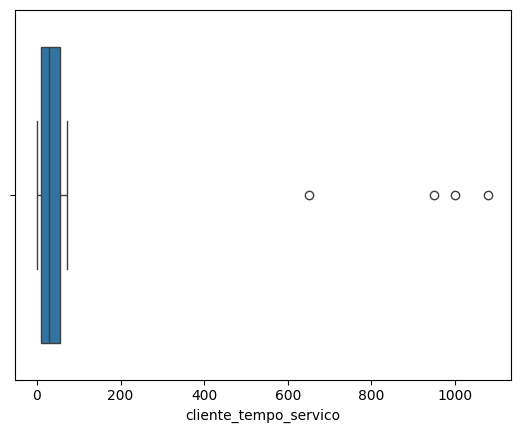

In [111]:
sns.boxplot(x=df_sem_out.cliente_tempo_servico)

In [112]:
df_sem_out.cliente_tempo_servico[outliers_idx]

1945    1080.0
1946    1000.0
1952     951.0
1956       2.0
1958      43.0
1963     650.0
1966      44.0
1970       7.0
1973       4.0
1974       1.0
Name: cliente_tempo_servico, dtype: float64

In [113]:
df_sem_out.columns

Index(['id_cliente', 'Churn', 'cliente_genero', 'cliente_idoso',
       'cliente_parceiro', 'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'telefone_varias_linhas',
       'internet_servico_internet', 'internet_seguranca_online',
       'internet_backup_online', 'internet_protecao_dispositivo',
       'internet_suporte_tecnico', 'internet_tv_streaming',
       'internet_filmes_streaming', 'conta_contrato',
       'conta_faturamente_eletronico', 'conta_metodo_pagamento',
       'conta_cobranca_mensal', 'conta_cobranca_Total'],
      dtype='object')

In [114]:
df_sem_out.columns = df_sem_out.columns.str.lower()
df_sem_out.columns

Index(['id_cliente', 'churn', 'cliente_genero', 'cliente_idoso',
       'cliente_parceiro', 'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'telefone_varias_linhas',
       'internet_servico_internet', 'internet_seguranca_online',
       'internet_backup_online', 'internet_protecao_dispositivo',
       'internet_suporte_tecnico', 'internet_tv_streaming',
       'internet_filmes_streaming', 'conta_contrato',
       'conta_faturamente_eletronico', 'conta_metodo_pagamento',
       'conta_cobranca_mensal', 'conta_cobranca_total'],
      dtype='object')

In [115]:
colunas = ['cliente_tempo_servico', 'conta_cobranca_mensal', 'conta_cobranca_total']

In [116]:
df_sem_out[outliers_idx][colunas]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


# Removendo outliers

Como não podemos inferir com propriedade, é necessário remover os valores outliers restantes

In [117]:
q1 = df_sem_nulo.cliente_tempo_servico.quantile(.25)
q1

9.0

In [118]:
q3 = df_sem_nulo.cliente_tempo_servico.quantile(.75)
q3

56.0

In [119]:
iqr = q3 - q1
iqr

47.0

In [120]:
limite_inferior = q1 - 1.5 * iqr
limite_inferior

-61.5

In [121]:
limite_superior = q3 + 1.5 * iqr
limite_superior

126.5

In [122]:
outliers_idx = (df_sem_out.cliente_tempo_servico < limite_inferior) | (df_sem_out.cliente_tempo_servico > limite_superior)
outliers_idx

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente_tempo_servico, Length: 7006, dtype: bool

In [123]:
df_sem_out[outliers_idx][colunas]

,cliente_tempo_servico,conta_cobranca_mensal,conta_cobranca_total
1945,1080.0,103.9,112212.0
1946,1000.0,45.9,45900.0
1952,951.0,84.1,79895.0
1963,650.0,73.0,47450.0


In [124]:
df_sem_out = df_sem_out[~outliers_idx]
df_sem_out

,id_cliente,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


<Axes: xlabel='cliente_tempo_servico'>

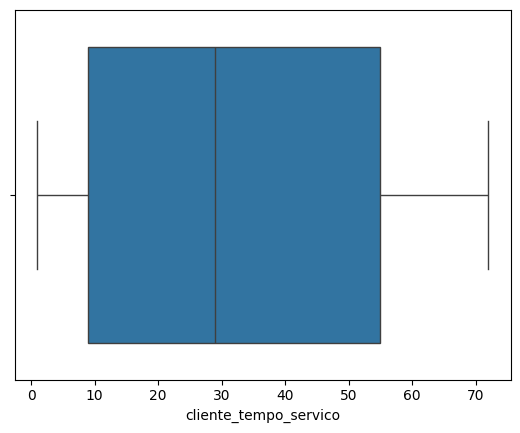

In [125]:
sns.boxplot(x=df_sem_out.cliente_tempo_servico)

In [126]:
df_sem_out.reset_index(drop=True, inplace=True)
df_sem_out

,id_cliente,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


# Desafio: identificando fraudes

In [127]:
df_desafio = pd.DataFrame({'ID da transação': range(1, 31),
                   'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
                   'Data da transação': pd.date_range(start='2022-01-01',
                                                      end='2022-01-30',
                                                      freq='D'),
                   'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil',
                                          'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'Nova Iorque, EUA',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'Rio de Janeiro, Brasil',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'Los Angeles, EUA', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'São Paulo, Brasil', 'São Paulo, Brasil',
                                          'Miami, EUA', 'São Paulo, Brasil']})

In [128]:
df_desafio

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"
5,6,913,2022-01-06,"Nova Iorque, EUA"
6,7,250,2022-01-07,"São Paulo, Brasil"
7,8,400,2022-01-08,"São Paulo, Brasil"
8,9,200,2022-01-09,"São Paulo, Brasil"
9,10,150,2022-01-10,"Rio de Janeiro, Brasil"


In [129]:
def encontrar_outliers(df, coluna):
  q1 = df[coluna].quantile(.25)
  q3 = df[coluna].quantile(.75)

  iqr = q3 - q1
  limite_inferior = q1 - 1.5 * iqr
  limite_superior = q3 + 1.5 * iqr

  outliers_idx = (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)

  return outliers_idx.sum(), df[outliers_idx][coluna], sns.boxplot(x=df[coluna])

(3,
 5     913
 16    805
 28    800
 Name: Valor da transação, dtype: int64,
 <Axes: xlabel='Valor da transação'>)

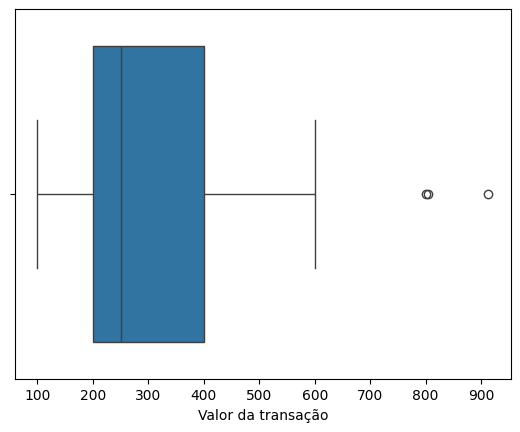

In [130]:
encontrar_outliers(df_desafio, 'Valor da transação')

# Trabalhando com variáveis categóricas

In [131]:
df_sem_out.head()

,id_cliente,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,...,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [132]:
df_sem_id = df_sem_out.drop('id_cliente', axis=1).copy()
df_sem_id.head()

,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [133]:
mapeamento = {'nao' : 0, 'sim': 1,
              'masculino' : 0, 'feminino' : 1}

In [134]:
for col in df_sem_id.columns:
    print(f'coluna: {col}')
    print(df_sem_id[col].unique())
    print('-' * 30)

coluna: churn
['nao' 'sim']
------------------------------
coluna: cliente_genero
['masculino' 'feminino']
------------------------------
coluna: cliente_idoso
[0 1]
------------------------------
coluna: cliente_parceiro
['nao' 'sim']
------------------------------
coluna: cliente_dependentes
['nao' 'sim']
------------------------------
coluna: cliente_tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
coluna: telefone_servico_telefone
['sim' 'nao']
------------------------------
coluna: telefone_varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
coluna: internet_servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
coluna: internet_seguranca_onlin

In [135]:
colunas_categóricas_binárias = ['telefone_servico_telefone',
                                'churn',
                                'cliente_parceiro',
                                'cliente_dependentes',
                                'conta_faturamente_eletronico',
                                'cliente_genero']

In [136]:
df_sem_id[colunas_categóricas_binárias] = df_sem_id[colunas_categóricas_binárias].replace(mapeamento)
df_sem_id

,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,telefone_varias_linhas,internet_servico_internet,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,internet_tv_streaming,internet_filmes_streaming,conta_contrato,conta_faturamente_eletronico,conta_metodo_pagamento,conta_cobranca_mensal,conta_cobranca_total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [137]:
for col in df_sem_id.columns:
    print(f'coluna: {col}')
    print(df_sem_id[col].unique())
    print('-' * 30)

coluna: churn
[0 1]
------------------------------
coluna: cliente_genero
[0 1]
------------------------------
coluna: cliente_idoso
[0 1]
------------------------------
coluna: cliente_parceiro
[0 1]
------------------------------
coluna: cliente_dependentes
[0 1]
------------------------------
coluna: cliente_tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
coluna: telefone_servico_telefone
[1 0]
------------------------------
coluna: telefone_varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
coluna: internet_servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
coluna: internet_seguranca_online
['nao' 'sim' 'sem servico de internet']
---------

# One Hot Encoder (Dummy)

In [138]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [139]:
pd.get_dummies(s, dtype=np.int64)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [140]:
df_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn                          7002 non-null   int64  
 1   cliente_genero                 7002 non-null   int64  
 2   cliente_idoso                  7002 non-null   int64  
 3   cliente_parceiro               7002 non-null   int64  
 4   cliente_dependentes            7002 non-null   int64  
 5   cliente_tempo_servico          7002 non-null   float64
 6   telefone_servico_telefone      7002 non-null   int64  
 7   telefone_varias_linhas         7002 non-null   object 
 8   internet_servico_internet      7002 non-null   object 
 9   internet_seguranca_online      7002 non-null   object 
 10  internet_backup_online         7002 non-null   object 
 11  internet_protecao_dispositivo  7002 non-null   object 
 12  internet_suporte_tecnico       7002 non-null   o

(dtype = object) = colunas categóricas

In [141]:
df_dummies = pd.get_dummies(df_sem_id, dtype=np.int64).copy()
df_dummies.head()

,churn,cliente_genero,cliente_idoso,cliente_parceiro,cliente_dependentes,cliente_tempo_servico,telefone_servico_telefone,conta_faturamente_eletronico,conta_cobranca_mensal,conta_cobranca_total,...,internet_filmes_streaming_nao,internet_filmes_streaming_sem servico de internet,internet_filmes_streaming_sim,conta_contrato_dois anos,conta_contrato_mes a mes,conta_contrato_um ano,conta_metodo_pagamento_cartao de credito (automatico),conta_metodo_pagamento_cheque eletronico,conta_metodo_pagamento_cheque pelo correio,conta_metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.9,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.9,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.0,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.9,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.4,571.45,...,0,0,1,0,1,0,1,0,0,0


In [142]:
df_dummies.columns

Index(['churn', 'cliente_genero', 'cliente_idoso', 'cliente_parceiro',
       'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'conta_faturamente_eletronico',
       'conta_cobranca_mensal', 'conta_cobranca_total',
       'telefone_varias_linhas_nao',
       'telefone_varias_linhas_sem servico de telefone',
       'telefone_varias_linhas_sim', 'internet_servico_internet_DSL',
       'internet_servico_internet_fibra otica',
       'internet_servico_internet_nao', 'internet_seguranca_online_nao',
       'internet_seguranca_online_sem servico de internet',
       'internet_seguranca_online_sim', 'internet_backup_online_nao',
       'internet_backup_online_sem servico de internet',
       'internet_backup_online_sim', 'internet_protecao_dispositivo_nao',
       'internet_protecao_dispositivo_sem servico de internet',
       'internet_protecao_dispositivo_sim', 'internet_suporte_tecnico_nao',
       'internet_suporte_tecnico_sem servico de internet',
     

In [143]:
df_dummies.columns = df_dummies.columns.str.replace(' ', '_')
df_dummies.columns

Index(['churn', 'cliente_genero', 'cliente_idoso', 'cliente_parceiro',
       'cliente_dependentes', 'cliente_tempo_servico',
       'telefone_servico_telefone', 'conta_faturamente_eletronico',
       'conta_cobranca_mensal', 'conta_cobranca_total',
       'telefone_varias_linhas_nao',
       'telefone_varias_linhas_sem_servico_de_telefone',
       'telefone_varias_linhas_sim', 'internet_servico_internet_DSL',
       'internet_servico_internet_fibra_otica',
       'internet_servico_internet_nao', 'internet_seguranca_online_nao',
       'internet_seguranca_online_sem_servico_de_internet',
       'internet_seguranca_online_sim', 'internet_backup_online_nao',
       'internet_backup_online_sem_servico_de_internet',
       'internet_backup_online_sim', 'internet_protecao_dispositivo_nao',
       'internet_protecao_dispositivo_sem_servico_de_internet',
       'internet_protecao_dispositivo_sim', 'internet_suporte_tecnico_nao',
       'internet_suporte_tecnico_sem_servico_de_internet',
     

In [144]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   churn                                                       7002 non-null   int64  
 1   cliente_genero                                              7002 non-null   int64  
 2   cliente_idoso                                               7002 non-null   int64  
 3   cliente_parceiro                                            7002 non-null   int64  
 4   cliente_dependentes                                         7002 non-null   int64  
 5   cliente_tempo_servico                                       7002 non-null   float64
 6   telefone_servico_telefone                                   7002 non-null   int64  
 7   conta_faturamente_eletronico                                7002 non-null   int64  
 8 

# See you space cowboy...